In [3]:
l0 = 0.2
alpha = [60, 40, 1]
q = [16000, 5, 1]
k = [1, 5000, 100000]
u_ = 20
s_ = 400000

l = list(map(lambda a : l0 * a, alpha))
v_min = []
v = []
s = []
s_min = 0

for i, qi in enumerate(q):
	print("V_min({}) =".format(i), qi * l[i])
	v_min.append(qi * l[i])

for i, data in enumerate(zip(k, v_min)):
	ki, vi_min = data
	s_min += ki * vi_min
	print("S_min({}) = {}".format(i, ki*vi_min))

print("S_min =", s_min)

for i in range(len(l)):
	vi = l[i]*q[i] + (1 / (l0 * u_)) * (l[i]*q[i]/k[i])**0.5 * sum((li*qi*ki)**0.5 for li, qi, ki in zip(l, q, k))
	print("V({}) = {}".format(i, vi))
	v.append(vi)

for i, elems in enumerate(zip(k, v)):
	ki, vi = elems
	si = ki*vi
	print("S({}) = {}".format(i, si))
	s.append(si)

print("S =", sum(s))
print("S0 =", sum(s) - s_min)

v_min = []
for i, qi in enumerate(q):
	print("V_min({}) =".format(i), qi * alpha[i] * l0)
	v_min.append(qi * l[i])

v = []
for i in range(len(l)):
	vi = l0 * alpha[i] * q[i] + (s_/k[i]) * (k[i]*alpha[i]*q[i])**0.5 / sum((ki * ai * qi)**0.5 for ki, ai, qi in zip(k, alpha, q))
	print("V({}) = {}".format(i, vi))
	v.append(vi)

s_min = 0
for i, data in enumerate(zip(k, v_min)):
	ki, vi_min = data
	s_min += ki * vi_min
	print("S_min({}) = {}".format(i, ki*vi_min))

print("S_min =", s_min)
print("S0 =", s_ - s_min)

u = 1 / (s_ - s_min) * sum((ki * ai * qi)**0.5 for ki, ai, qi in zip(k, alpha, q))**2
print("U = {}".format(u))

V_min(0) = 192000.0
V_min(1) = 40.0
V_min(2) = 0.2
S_min(0) = 192000.0
S_min(1) = 200000.0
S_min(2) = 20000.0
S_min = 412000.0
V(0) = 304481.7282404932
V(1) = 62.960236631301086
V(2) = 0.5630332168567156
S(0) = 304481.7282404932
S(1) = 314801.18315650546
S(2) = 56303.32168567156
S = 675586.2330826703
S0 = 263586.23308267025
V_min(0) = 192000.0
V_min(1) = 40.0
V_min(2) = 0.2
V(0) = 362694.39010529034
V(1) = 74.84284647612824
V(2) = 0.7509137751406847
S_min(0) = 192000.0
S_min(1) = 200000.0
S_min(2) = 20000.0
S_min = 412000.0
S0 = -12000.0
U = -439.310388471117


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def calcS(u_):
    l = list(map(lambda a : l0 * a, alpha))
    v_min = []
    v = []
    s = []
    s_min = 0
    for i, qi in enumerate(q):
        v_min.append(qi * l[i])

    for i, data in enumerate(zip(k, v_min)):
        ki, vi_min = data
        s_min += ki * vi_min

    for i in range(len(l)):
        vi = l[i]*q[i] + (1 / (l0 * u_)) * (l[i]*q[i]/k[i])**0.5 * sum((li*qi*ki)**0.5 for li, qi, ki in zip(l, q, k))
        v.append(vi)

    for i, elems in enumerate(zip(k, v)):
        ki, vi = elems
        si = ki*vi
        s.append(si)

    return sum(s)

In [6]:
def calcU(s_):
    l = list(map(lambda a : l0 * a, alpha))
    v_min = []
    v = []
    s = []
    s_min = 0

    for i, qi in enumerate(q):
        v_min.append(qi * l[i])

    for i, data in enumerate(zip(k, v_min)):
        ki, vi_min = data
        s_min += ki * vi_min

    for i in range(len(l)):
        vi = l[i]*q[i] + (1 / (l0 * u_)) * (l[i]*q[i]/k[i])**0.5 * sum((li*qi*ki)**0.5 for li, qi, ki in zip(l, q, k))
        v.append(vi)

    for i, elems in enumerate(zip(k, v)):
        ki, vi = elems
        si = ki*vi
        s.append(si)
        
    v_min = []
    for i, qi in enumerate(q):
        v_min.append(qi * l[i])

    v = []
    for i in range(len(l)):
        vi = l0 * alpha[i] * q[i] + (s_/k[i]) * (k[i]*alpha[i]*q[i])**0.5 / sum((ki * ai * qi)**0.5 for ki, ai, qi in zip(k, alpha, q))
        v.append(vi)

    s_min = 0
    for i, data in enumerate(zip(k, v_min)):
        ki, vi_min = data
        s_min += ki * vi_min

    u = 1 / (s_ - s_min) * sum((ki * ai * qi)**0.5 for ki, ai, qi in zip(k, alpha, q))**2
    return u

In [12]:
x = range(1, 50)
y = [calcS(u) for u in x]

Text(0,0.5,'S')

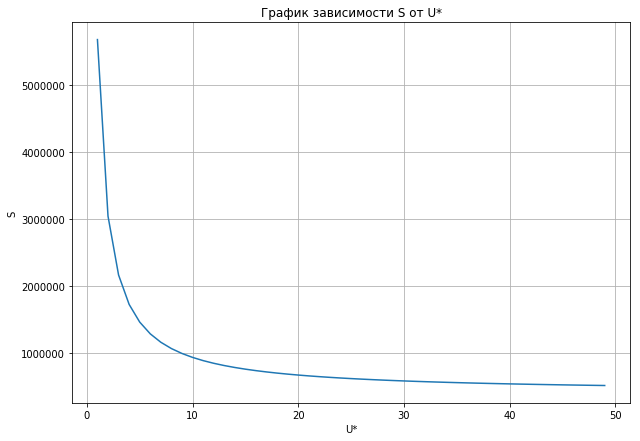

In [35]:
%matplotlib inline
plt.subplots(figsize=(10, 7))

plt.plot(x, y)
plt.grid(True)
plt.title("График зависимости S от U*")
plt.xlabel("U*")
plt.ylabel("S")

In [65]:
x = range(413000, 1000000, 10000)
y = [calcU(s) for s in x]

Text(0,0.5,'U')

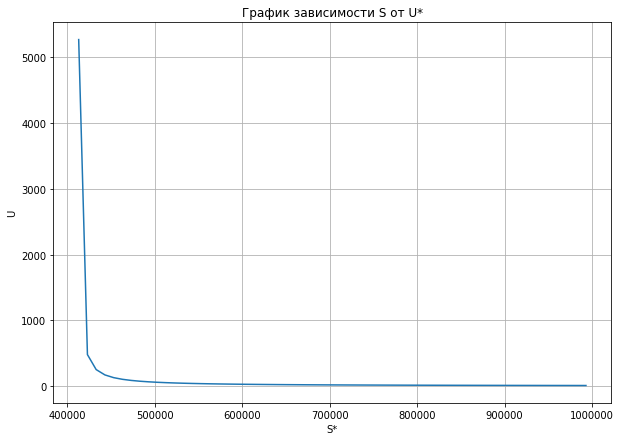

In [66]:
%matplotlib inline
plt.subplots(figsize=(10, 7))

plt.plot(x, y)
plt.grid(True)
plt.title("График зависимости S от U*")
plt.xlabel("S*")
plt.ylabel("U")

In [21]:
calcU(600000)

28.04108862581598

In [30]:
x = range(600000, 1000000, 6000)
y = [round(calcU(s), 3) for s in x]

In [31]:
y

[28.041,
 27.174,
 26.359,
 25.591,
 24.867,
 24.182,
 23.534,
 22.921,
 22.338,
 21.784,
 21.257,
 20.755,
 20.276,
 19.819,
 19.381,
 18.963,
 18.562,
 18.178,
 17.81,
 17.456,
 17.116,
 16.789,
 16.474,
 16.171,
 15.879,
 15.597,
 15.325,
 15.062,
 14.808,
 14.563,
 14.325,
 14.096,
 13.873,
 13.657,
 13.448,
 13.246,
 13.049,
 12.858,
 12.672,
 12.492,
 12.317,
 12.147,
 11.981,
 11.82,
 11.663,
 11.51,
 11.361,
 11.216,
 11.075,
 10.937,
 10.803,
 10.672,
 10.543,
 10.418,
 10.296,
 10.177,
 10.061,
 9.947,
 9.835,
 9.726,
 9.62,
 9.516,
 9.414,
 9.314,
 9.216,
 9.121,
 9.027]

In [39]:
for i in range(len(y) - 1):
#     print((y[i+1] - y[i]) / y[0] * 100)
    print( round((y[i+1] - y[i]), 3) )

-0.867
-0.815
-0.768
-0.724
-0.685
-0.648
-0.613
-0.583
-0.554
-0.527
-0.502
-0.479
-0.457
-0.438
-0.418
-0.401
-0.384
-0.368
-0.354
-0.34
-0.327
-0.315
-0.303
-0.292
-0.282
-0.272
-0.263
-0.254
-0.245
-0.238
-0.229
-0.223
-0.216
-0.209
-0.202
-0.197
-0.191
-0.186
-0.18
-0.175
-0.17
-0.166
-0.161
-0.157
-0.153
-0.149
-0.145
-0.141
-0.138
-0.134
-0.131
-0.129
-0.125
-0.122
-0.119
-0.116
-0.114
-0.112
-0.109
-0.106
-0.104
-0.102
-0.1
-0.098
-0.095
-0.094


In [38]:
[x for x in x]

[600000,
 606000,
 612000,
 618000,
 624000,
 630000,
 636000,
 642000,
 648000,
 654000,
 660000,
 666000,
 672000,
 678000,
 684000,
 690000,
 696000,
 702000,
 708000,
 714000,
 720000,
 726000,
 732000,
 738000,
 744000,
 750000,
 756000,
 762000,
 768000,
 774000,
 780000,
 786000,
 792000,
 798000,
 804000,
 810000,
 816000,
 822000,
 828000,
 834000,
 840000,
 846000,
 852000,
 858000,
 864000,
 870000,
 876000,
 882000,
 888000,
 894000,
 900000,
 906000,
 912000,
 918000,
 924000,
 930000,
 936000,
 942000,
 948000,
 954000,
 960000,
 966000,
 972000,
 978000,
 984000,
 990000,
 996000]